<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/notebooks/flags/F2379_CH05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#第5章：機器學習的基礎

##5-1 普適化：機器學習的終極目標

###5-1-1 低度配適與過度配適

####程式 5.1 在MNIST資料集中新增維度

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


####程式 5.2 用新的資料集來分別訓練模型

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 21s 50ms/step - loss: 0.6201 - accuracy: 0.8127 - val_loss: 0.3057 - val_accuracy: 0.9097
Epoch 2/10
375/375 [==============================] - 7s 19ms/step - loss: 0.2476 - accuracy: 0.9232 - val_loss: 0.1806 - val_accuracy: 0.9448
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1641 - accuracy: 0.9491 - val_loss: 0.2004 - val_accuracy: 0.9378
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1155 - accuracy: 0.9629 - val_loss: 0.1679 - val_accuracy: 0.9509
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0849 - accuracy: 0.9729 - val_loss: 0.1388 - val_accuracy: 0.9592
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0643 - accuracy: 0.9794 - val_loss: 0.1280 - val_accuracy: 0.9663
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0469 - accuracy: 0.9849 - val_loss: 0.1248 - val_accuracy: 0.965

####程式 5.3 繪製驗證準確度以進行比較

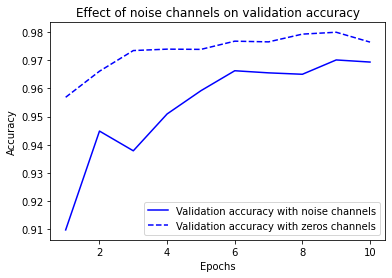

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
    label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
    label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

###5-1-2 普適化在深度學習中的本質

####程式 5.4 訓練模型來擬合標籤打亂後的MNIST資料集

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"])
model.fit(train_images, random_train_labels,
     epochs=100,
     batch_size=128,
     validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 12ms/step - loss: 2.3150 - accuracy: 0.1018 - val_loss: 2.3061 - val_accuracy: 0.1038
Epoch 2/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2999 - accuracy: 0.1165 - val_loss: 2.3158 - val_accuracy: 0.0954
Epoch 3/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2893 - accuracy: 0.1308 - val_loss: 2.3169 - val_accuracy: 0.1001
Epoch 4/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2750 - accuracy: 0.1432 - val_loss: 2.3294 - val_accuracy: 0.0991
Epoch 5/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2571 - accuracy: 0.1550 - val_loss: 2.3387 - val_accuracy: 0.0957
Epoch 6/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2353 - accuracy: 0.1690 - val_loss: 2.3590 - val_accuracy: 0.0954
Epoch 7/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2112 - accuracy: 0.1855 - val_loss: 2.3706 - val_accuracy:

##5-3 提升模型的擬合表現

###5-3-1 調整梯度下降的關鍵參數

####程式 5.7 使用過高的學習率來訓練MNIST模型

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"])
model.fit(train_images, train_labels,
     epochs=10,
     batch_size=128,
     validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 689.9052 - accuracy: 0.3646 - val_loss: 2.1518 - val_accuracy: 0.2465
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 3.7822 - accuracy: 0.2588 - val_loss: 2.5875 - val_accuracy: 0.2587
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 2.9699 - accuracy: 0.2593 - val_loss: 2.6201 - val_accuracy: 0.2558
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 3.2344 - accuracy: 0.2471 - val_loss: 2.1813 - val_accuracy: 0.2461
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 2.7375 - accuracy: 0.2500 - val_loss: 2.3769 - val_accuracy: 0.2533
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 2.6427 - accuracy: 0.2642 - val_loss: 2.5977 - val_accuracy: 0.2898
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 2.3743 - accuracy: 0.2654 - val_loss: 2.1605 - val_accuracy: 0.24

####程式 5.8 使用合理的學習率來訓練相同模型

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3492 - accuracy: 0.9115 - val_loss: 0.1356 - val_accuracy: 0.9622
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1406 - accuracy: 0.9637 - val_loss: 0.1491 - val_accuracy: 0.9666
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1165 - accuracy: 0.9723 - val_loss: 0.1510 - val_accuracy: 0.9682
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1014 - accuracy: 0.9775 - val_loss: 0.1887 - val_accuracy: 0.9686
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0928 - accuracy: 0.9814 - val_loss: 0.1981 - val_accuracy: 0.9701
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0792 - accuracy: 0.9847 - val_loss: 0.2171 - val_accuracy: 0.9736
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0706 - accuracy: 0.9864 - val_loss: 0.2297 - val_accuracy: 0.9738

###5-3-3 提升模型容量(capacity)

####程式 5.9 使用MNIST資料集訓練小模型

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6622 - accuracy: 0.8384 - val_loss: 0.3589 - val_accuracy: 0.9022
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3507 - accuracy: 0.9037 - val_loss: 0.3083 - val_accuracy: 0.9137
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3155 - accuracy: 0.9120 - val_loss: 0.2897 - val_accuracy: 0.9190
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.9166 - val_loss: 0.2817 - val_accuracy: 0.9214
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2895 - accuracy: 0.9192 - val_loss: 0.2772 - val_accuracy: 0.9241
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2825 - accuracy: 0.9203 - val_loss: 0.2740 - val_accuracy: 0.9221
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.9220 - val_loss: 0.2698 - val_accuracy: 0.9244
Epoch 

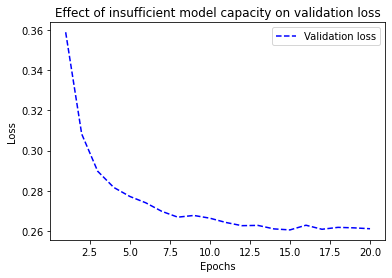

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
    label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3653 - accuracy: 0.8968 - val_loss: 0.1920 - val_accuracy: 0.9446
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1611 - accuracy: 0.9521 - val_loss: 0.1374 - val_accuracy: 0.9595
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1134 - accuracy: 0.9648 - val_loss: 0.1194 - val_accuracy: 0.9639
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0872 - accuracy: 0.9727 - val_loss: 0.1041 - val_accuracy: 0.9693
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0697 - accuracy: 0.9789 - val_loss: 0.0945 - val_accuracy: 0.9724
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0572 - accuracy: 0.9828 - val_loss: 0.0949 - val_accuracy: 0.9724
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0978 - val_accuracy: 0.9716
Epoch 

##5-4 提升普適化能力

###5-4-4 將模型常規化

####程式 5.10 原始模型

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
       loss="binary_crossentropy",
       metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5374 - accuracy: 0.7867 - val_loss: 0.4322 - val_accuracy: 0.8235
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3242 - accuracy: 0.8961 - val_loss: 0.3141 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2357 - accuracy: 0.9239 - val_loss: 0.2966 - val_accuracy: 0.8812
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1867 - accuracy: 0.9411 - val_loss: 0.2730 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1527 - accuracy: 0.9514 - val_loss: 0.2774 - val_accuracy: 0.8912
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1270 - accuracy: 0.9611 - val_loss: 0.2882 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1047 - accurac

####程式 5.11 容量較小的模型版本

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
       loss="binary_crossentropy",
       metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6113 - accuracy: 0.7673 - val_loss: 0.5328 - val_accuracy: 0.8387
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4706 - accuracy: 0.8741 - val_loss: 0.4386 - val_accuracy: 0.8614
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3781 - accuracy: 0.8948 - val_loss: 0.3728 - val_accuracy: 0.8790
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3130 - accuracy: 0.9071 - val_loss: 0.3319 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2651 - accuracy: 0.9196 - val_loss: 0.3041 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2286 - accuracy: 0.9294 - val_loss: 0.2922 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2016 - accuracy: 0.9364 - val_loss: 0.2783 - val_accuracy: 0.8911
Epoch 8/20
30

####程式 5.12 具有更高容量的模型版本

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
       loss="binary_crossentropy",
       metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 11s 352ms/step - loss: 0.5470 - accuracy: 0.7473 - val_loss: 0.3216 - val_accuracy: 0.8827
Epoch 2/20
30/30 [==============================] - 9s 295ms/step - loss: 0.2708 - accuracy: 0.8967 - val_loss: 0.2677 - val_accuracy: 0.8927
Epoch 3/20
30/30 [==============================] - 9s 295ms/step - loss: 0.1548 - accuracy: 0.9415 - val_loss: 0.2882 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 9s 292ms/step - loss: 0.0691 - accuracy: 0.9762 - val_loss: 0.3545 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 9s 294ms/step - loss: 0.0887 - accuracy: 0.9803 - val_loss: 0.3643 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 9s 293ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.5819 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 9s 293ms/step - loss: 4.1000e-04 - accuracy: 1.0000 - val_loss: 0.6599 - val_accuracy: 0.8882
E

####程式 5.13 將L2常規化加入模型中

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5991 - accuracy: 0.7780 - val_loss: 0.4651 - val_accuracy: 0.8726
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3929 - accuracy: 0.8969 - val_loss: 0.4396 - val_accuracy: 0.8437
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3251 - accuracy: 0.9173 - val_loss: 0.3783 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2971 - accuracy: 0.9255 - val_loss: 0.3682 - val_accuracy: 0.8819
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2743 - accuracy: 0.9342 - val_loss: 0.3644 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2623 - accuracy: 0.9377 - val_loss: 0.3617 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2527 - accuracy: 0.9421 - val_loss: 0.3751 - val_accuracy: 0.8805
Epoch 8/20
30

####程式 5.14 Keras提供不同的權重常規化物件

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

####程式 5.15 將Dropout層添加到IMDB神經網路

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.6348 - accuracy: 0.6323 - val_loss: 0.5144 - val_accuracy: 0.8415
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5122 - accuracy: 0.7637 - val_loss: 0.3915 - val_accuracy: 0.8773
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4289 - accuracy: 0.8189 - val_loss: 0.3297 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3607 - accuracy: 0.8546 - val_loss: 0.2982 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3110 - accuracy: 0.8812 - val_loss: 0.2923 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2733 - accuracy: 0.9030 - val_loss: 0.2732 - val_accuracy: 0.8933
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2379 - accuracy: 0.9169 - val_loss: 0.2774 - val_accuracy: 0.8927
Epoch 8/20
30